# Importing Libraries

In [1]:
# Uncomment install if required 
# !pip install prophet
# !pip install plotly

In [2]:
import os
import json
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt 
import seaborn as sns 
import pymongo
import time 
from prophet import Prophet
import joblib
from dotenv import load_dotenv

* Load dotenv file

In [3]:
load_dotenv(dotenv_path=r"D:\NCI\SEM 1\Analytics Programming and Data Visualization\Project\.env")

True

# Load data 

In [4]:
def load_data(path):
    file_extension = path.split("/")[-1].split(".")[-1]
    try:
        if not os.path.exists(path):
            return ("Specified path incorrect!")
            
        if file_extension == "csv":
            return pd.read_csv(path)
        elif file_extension == "json":
            # return pd.read_json(path)
            with open(json_file_path, 'r') as file:
                data = json.load(file)
                return data
        else:
            print("Unexpected file extension!")
    except FileNotFoundError as e:
        print("No file found at specified location!")
        print(e)
    except Exception as e: 
        print(e)    

In [5]:
csv_file_path = "D:/Datasets/Liquor_Sales_USA/Warehouse_and_Retail_Sales.csv"
json_file_path = "D:/Datasets/Liquor_Sales_USA/Warehouse_and_Retail_Sales.json"

### CSV

In [6]:
df = load_data(csv_file_path)

* Analysis of Data for Data Correction

In [7]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [8]:
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [9]:
df.isna().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


* Visualization

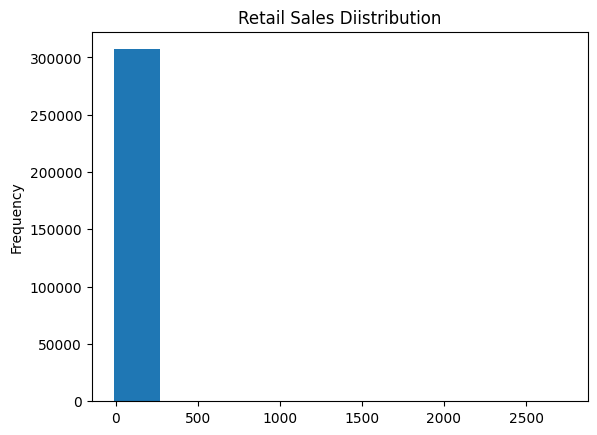

In [12]:
df["RETAIL SALES"].plot(kind="hist")
plt.title("Retail Sales Diistribution")
plt.show()

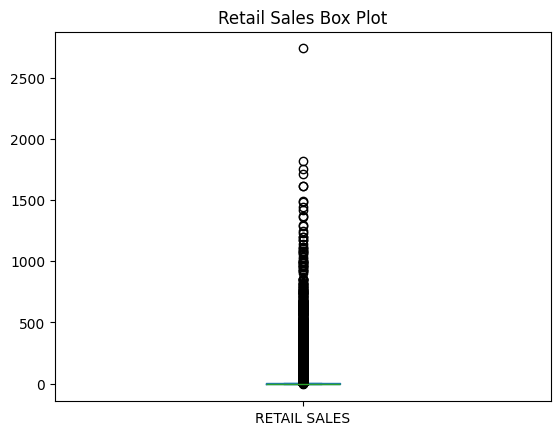

In [13]:
df["RETAIL SALES"].plot(kind="box")
plt.title("Retail Sales Box Plot")
plt.show()

In [14]:
# Retail Sales above 500 
sum(df["RETAIL SALES"] > 500)

203

In [15]:
# Records of such 
df[df["RETAIL SALES"] > 500]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
982,2020,1,NaN,2,ICE,NON-ALCOHOL,542.00,0.00,0.0
1364,2020,1,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,679.00,766.00,14408.5
1873,2020,1,HEINEKEN USA,23886,HEINEKEN LOOSE NR - 12OZ,BEER,681.00,687.00,5940.0
8287,2020,1,FIFTH GENERATION INC,53929,TITO'S HANDMADE VODKA - 1.75L,LIQUOR,848.82,929.17,26.0
12942,2020,7,NaN,2,ICE,NON-ALCOHOL,2739.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...
297544,2020,9,CROWN IMPORTS,23445,CORONA EXTRA LOOSE NR - 12OZ,BEER,748.00,451.00,11710.0
304219,2020,9,FIFTH GENERATION INC,53929,TITO'S HANDMADE VODKA - 1.75L,LIQUOR,1231.24,1391.00,22.0
307208,2020,9,MILLER BREWING COMPANY,90590,MILLER LITE 30PK CAN - 12OZ,BEER,552.00,475.00,6273.0
307387,2020,9,CROWN IMPORTS,96750,CORONA EXTRA 2/12 NR - 12OZ,BEER,567.54,430.00,12555.0


In [16]:
# Row, Columns
df.shape

(307645, 9)

In [17]:
# Median of Retail sales
df["RETAIL SALES"].median()

np.float64(0.32)

In [18]:
# Fill null values in retail sales with median value 
df["RETAIL SALES"].fillna(df["RETAIL SALES"].median(), inplace=True)

In [19]:
# How many suppliers are null for records with item type been at index 1 
df[df["ITEM TYPE"] == df[df["SUPPLIER"].isna()]["ITEM TYPE"].value_counts().index[1]]["SUPPLIER"].isna().sum()

np.int64(48)

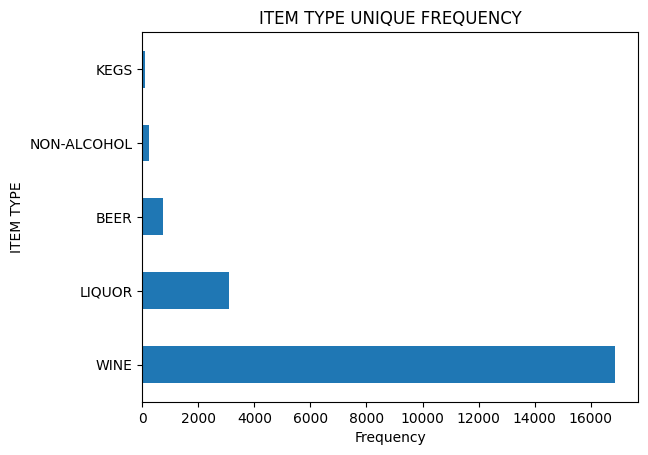

In [20]:
# Item type frequency of the mode supplier 
df[df["SUPPLIER"] == df["SUPPLIER"].mode()[0]]["ITEM TYPE"].value_counts().plot(kind="barh")
plt.title("ITEM TYPE UNIQUE FREQUENCY")
plt.xlabel("Frequency")
plt.show()

In [21]:
df[df["ITEM TYPE"].isna()]

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
95673,2017,10,REPUBLIC NATIONAL DISTRIBUTING CO,347939,FONTANAFREDDA BAROLO SILVER LABEL 750 ML,NaN,0.0,0.0,1.0


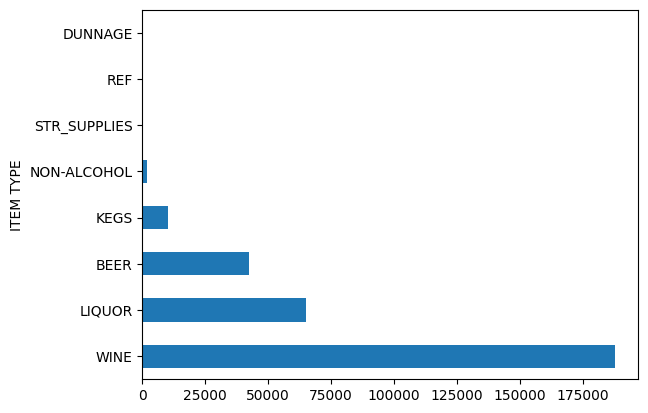

In [22]:
df["ITEM TYPE"].value_counts().plot(kind="barh")
plt.show()

In [23]:
df["ITEM TYPE"].mode()[0]

'WINE'

In [24]:
df.fillna({"ITEM TYPE": df["ITEM TYPE"].mode()[0]}, inplace=True)

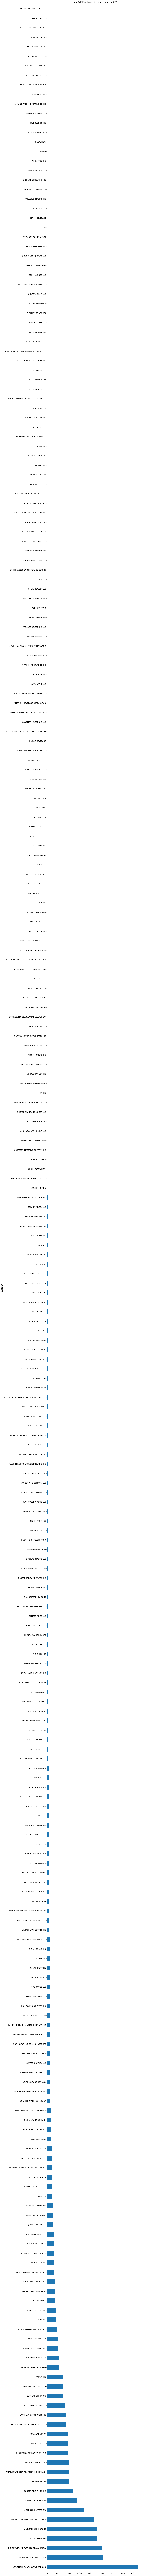

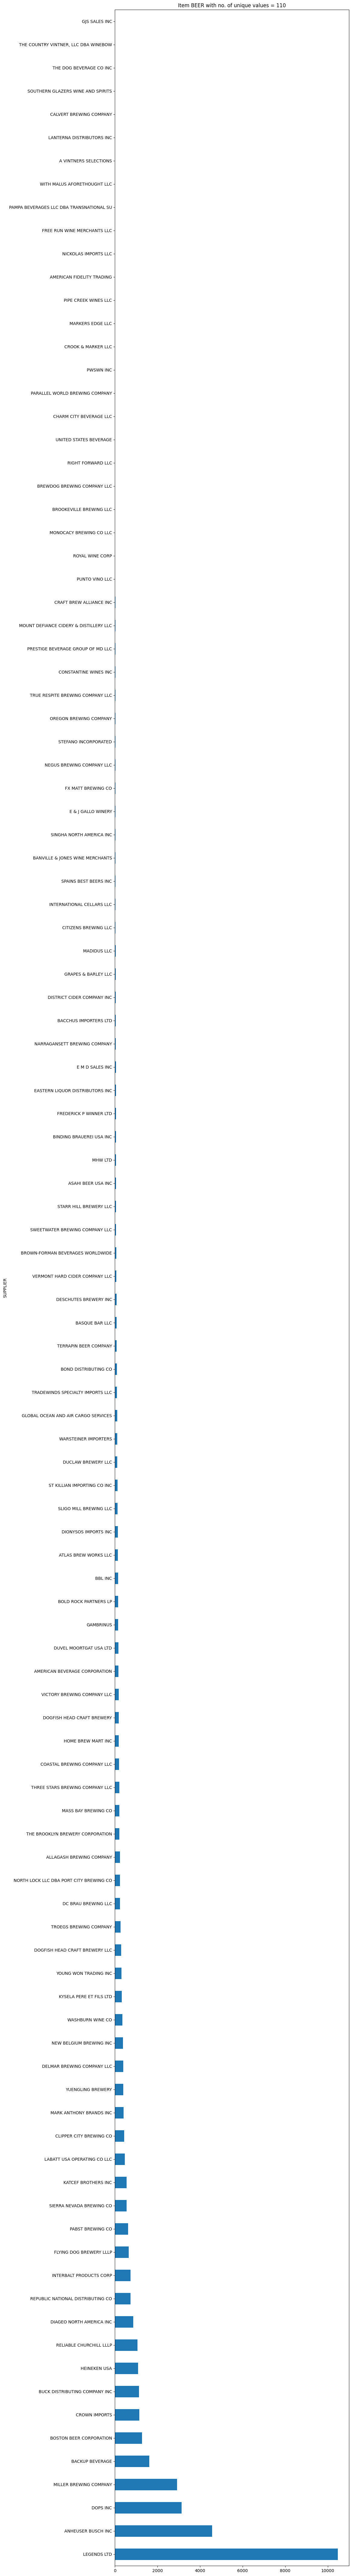

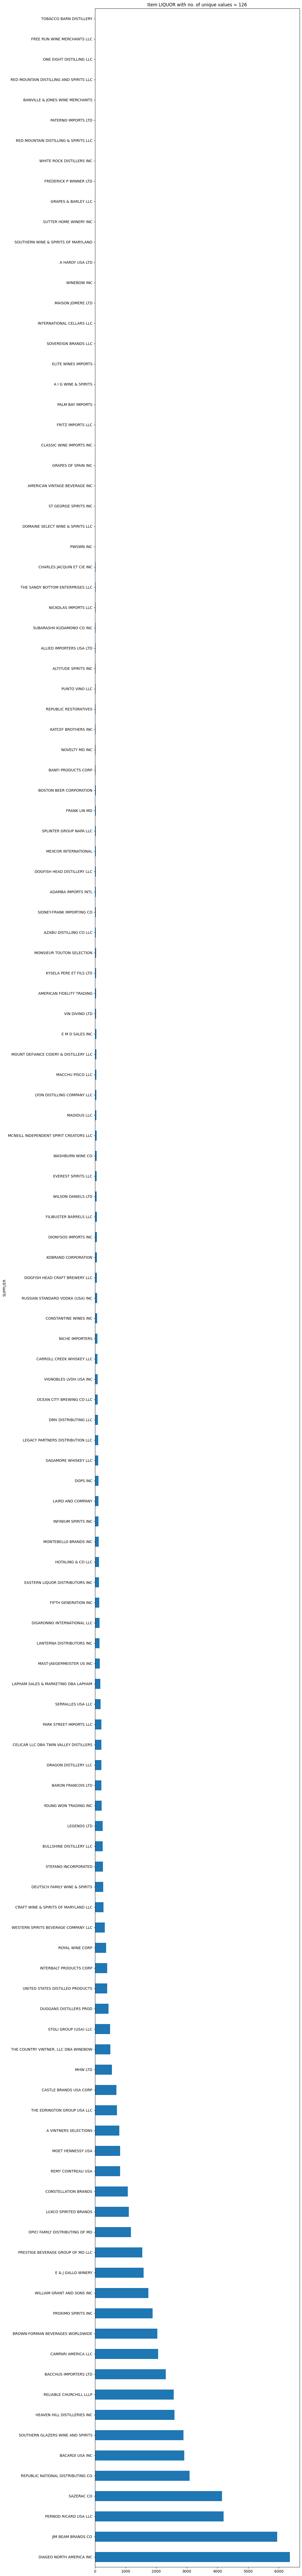

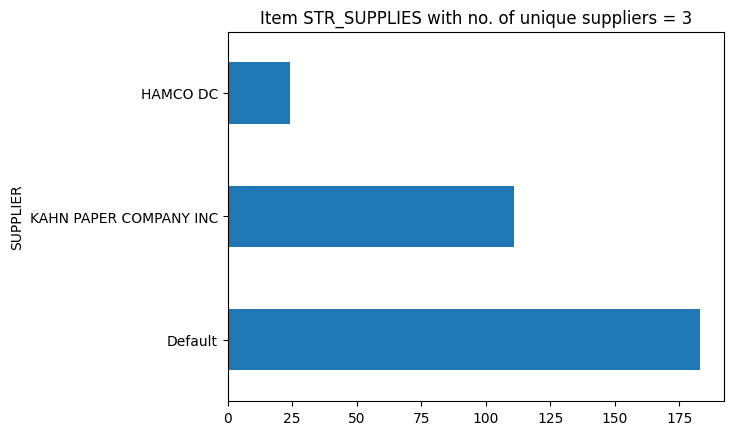

In [25]:
# 4 types present 
for i in range(4):
    # For more frequency 
    if i < 3:
        # Making size (10, # of unique vals)
        plt.figure(figsize=(10, df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[i]]["SUPPLIER"].nunique()))
        # all unique supplier for each i item type
        df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[i]]["SUPPLIER"].value_counts().plot(kind="barh")
        plt.title(f"Item {df["ITEM TYPE"].unique()[i]} with no. of unique values = {df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[i]]["SUPPLIER"].nunique()}")
        plt.show()
    # For less frequency 
    else:
        df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[i]]["SUPPLIER"].value_counts().plot(kind="barh")
        plt.title(f"Item {df["ITEM TYPE"].unique()[i]} with no. of unique suppliers = {df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[i]]["SUPPLIER"].nunique()}")
        plt.show()

In [26]:
df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[3]]["SUPPLIER"].mode()

0    Default
Name: SUPPLIER, dtype: object

In [27]:
# Replace supplier type value to fourth unique value where the item type is item 4
item4 = df["ITEM TYPE"].unique()[3]
replacement = df[df["ITEM TYPE"] == df["ITEM TYPE"].unique()[3]]["SUPPLIER"].mode()[0]

df.loc[
    (df["ITEM TYPE"] == item4) & (df["SUPPLIER"].isna()),
    "SUPPLIER"
] = replacement

In [28]:
df.loc[
    (df["ITEM TYPE"] == item4) & (df["SUPPLIER"].isna()),
    "SUPPLIER"
]
# No null values check for this item type 

Series([], Name: SUPPLIER, dtype: object)

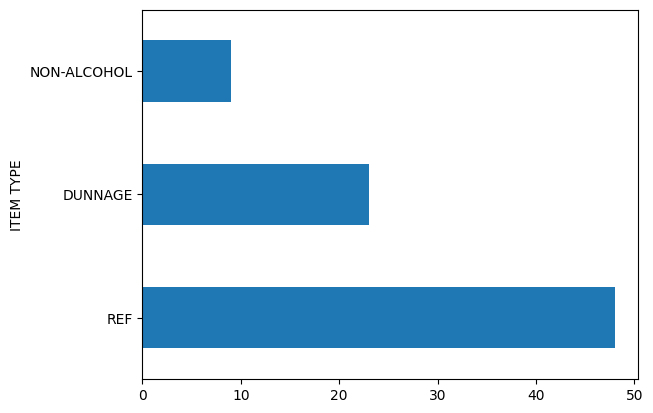

In [29]:
# Item for records with null suppllier 
df[df["SUPPLIER"].isna()]["ITEM TYPE"].value_counts().plot(kind="barh")
plt.show()

In [30]:
df.fillna({"SUPPLIER":"Default"}, inplace=True)

In [31]:
df.isna().sum().sum()

np.int64(0)

* Make subset with each month and limit size in thousands

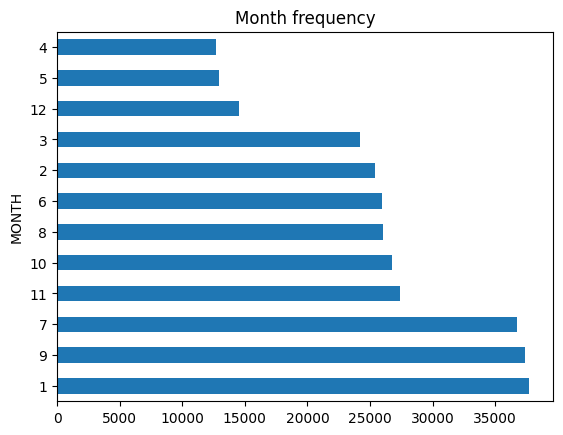

In [32]:
df["MONTH"].value_counts().plot(kind="barh")
plt.title("Month frequency")
plt.show()

In [33]:
# Each month share by percentage in whole dataset 
for i in range(df["MONTH"].nunique()):
    print(f"Month: {i+1}, Count %: {(sum(df["MONTH"] == (i + 1))/len(df) * 100):.2f}%")

Month: 1, Count %: 12.26%
Month: 2, Count %: 8.25%
Month: 3, Count %: 7.87%
Month: 4, Count %: 4.14%
Month: 5, Count %: 4.21%
Month: 6, Count %: 8.44%
Month: 7, Count %: 11.93%
Month: 8, Count %: 8.45%
Month: 9, Count %: 12.15%
Month: 10, Count %: 8.68%
Month: 11, Count %: 8.90%
Month: 12, Count %: 4.71%


In [34]:
# Each year share by percentage in whole dataset
for i in (df["YEAR"].unique()):
    print(f"Year: {i}, Count %: {sum(df["YEAR"] == i)/len(df) * 100:.2f}%")

Year: 2020, Count %: 15.04%
Year: 2017, Count %: 31.30%
Year: 2018, Count %: 8.60%
Year: 2019, Count %: 45.06%


In [35]:
# Each month in each year share by percentage with respect to that year and whole dataset
for year in df["YEAR"].unique():
    for month in df[df["YEAR"] == year]["MONTH"].unique():
        per_mnth_yr = sum(df[df["YEAR"] == year]["MONTH"] == month)/len(df[df["YEAR"] == year])
        per_mnth_over_all = sum(df[df["YEAR"] == year]["MONTH"] == month)/len(df)
        print(f"Year: {year}, Month: {month}, Count of month per year %: {(per_mnth_yr * 100):.2f}%")
        print(f"Year: {year}, Month: {month}, Count of month %: {(per_mnth_over_all * 100):.2f}%")

Year: 2020, Month: 1, Count of month per year %: 25.90%
Year: 2020, Month: 1, Count of month %: 3.90%
Year: 2020, Month: 9, Count of month per year %: 25.02%
Year: 2020, Month: 9, Count of month %: 3.76%
Year: 2020, Month: 7, Count of month per year %: 24.18%
Year: 2020, Month: 7, Count of month %: 3.64%
Year: 2020, Month: 3, Count of month per year %: 24.90%
Year: 2020, Month: 3, Count of month %: 3.75%
Year: 2017, Month: 6, Count of month per year %: 14.15%
Year: 2017, Month: 6, Count of month %: 4.43%
Year: 2017, Month: 7, Count of month per year %: 13.52%
Year: 2017, Month: 7, Count of month %: 4.23%
Year: 2017, Month: 8, Count of month per year %: 14.11%
Year: 2017, Month: 8, Count of month %: 4.42%
Year: 2017, Month: 12, Count of month per year %: 15.06%
Year: 2017, Month: 12, Count of month %: 4.71%
Year: 2017, Month: 9, Count of month per year %: 13.90%
Year: 2017, Month: 9, Count of month %: 4.35%
Year: 2017, Month: 10, Count of month per year %: 14.15%
Year: 2017, Month: 10, 

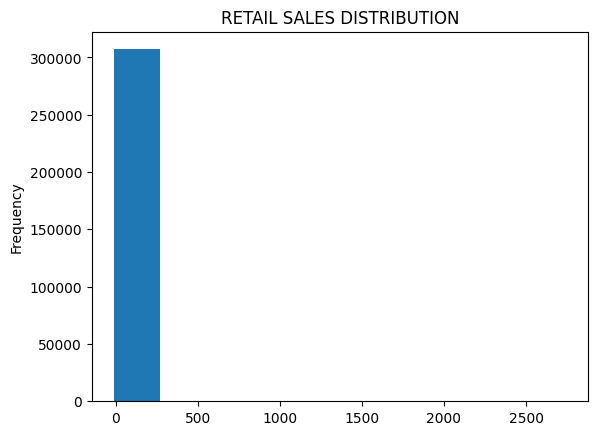

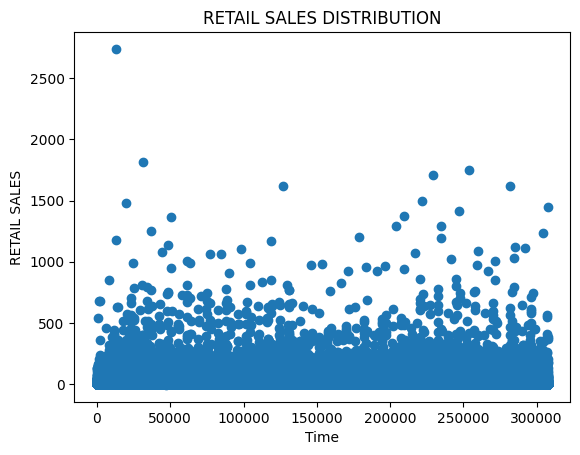

In [36]:
df["RETAIL SALES"].plot(kind="hist")
plt.title("RETAIL SALES DISTRIBUTION")
plt.show()

plt.scatter(range(len(df)), df["RETAIL SALES"].values)
plt.xlabel("Time")
plt.ylabel("RETAIL SALES")
plt.title("RETAIL SALES DISTRIBUTION")
plt.show()

In [37]:
# Testing below idea 
df_2020_1 = df.loc[
    (df["YEAR"] == 2020) & (df["MONTH"] == 1),
    :
]

df_2020_1_4_percent = df_2020_1.iloc[:int(len(df_2020_1)*.04), :]

In [38]:
def sub_data(df : pd.DataFrame) -> pd.DataFrame:
    """
    Takes a dataframe, 
    subset at each unique year and month, 
    then create a new subset of size actual in original dataset, 
    then return concatenate all subset and return.

    Input:
    df: Pandas DataFrame

    Output:
    Pandas DataFrame: new subset smaller size but with same proportion

    Example:
    new_df = sub_data(df)
    """
    data = dict()
    for year in df["YEAR"].unique():
        for month in df[df["YEAR"] == year]["MONTH"].unique():
            percent_mnth_over_all = sum(df[df["YEAR"] == year]["MONTH"] == month)/len(df)
            df_year_month = df.loc[
                (df["YEAR"] == year) & (df["MONTH"] == month),
                :
            ]
            df_year_month_x_percent = df_year_month.iloc[:int(len(df_year_month) * percent_mnth_over_all), :]
            data[f"df_{year}_{month}_{percent_mnth_over_all}_percent"] = df_year_month_x_percent
    df_subset_stratified = pd.concat([data[key] for key in data.keys()])
    return df_subset_stratified

In [39]:
# Subdata with lower size but same proportion 
new_df = sub_data(df)

In [40]:
# Validating the proportion 

for year in new_df["YEAR"].unique():
    for month in new_df[new_df["YEAR"] == year]["MONTH"].unique():
        per_mnth_yr = sum(new_df[new_df["YEAR"] == year]["MONTH"] == month)/len(new_df[new_df["YEAR"] == year])
        per_mnth_over_all = sum(new_df[new_df["YEAR"] == year]["MONTH"] == month)/len(new_df)
        print(f"Year: {year}, Month: {month}, Count of month per year %: {(per_mnth_yr * 100):.2f}%")
        print(f"Year: {year}, Month: {month}, Count of month %: {(per_mnth_over_all * 100):.2f}%")

Year: 2020, Month: 1, Count of month per year %: 26.84%
Year: 2020, Month: 1, Count of month %: 3.63%
Year: 2020, Month: 9, Count of month per year %: 25.00%
Year: 2020, Month: 9, Count of month %: 3.38%
Year: 2020, Month: 7, Count of month per year %: 23.39%
Year: 2020, Month: 7, Count of month %: 3.17%
Year: 2020, Month: 3, Count of month per year %: 24.77%
Year: 2020, Month: 3, Count of month %: 3.35%
Year: 2017, Month: 6, Count of month per year %: 14.00%
Year: 2017, Month: 6, Count of month %: 4.69%
Year: 2017, Month: 7, Count of month per year %: 12.79%
Year: 2017, Month: 7, Count of month %: 4.28%
Year: 2017, Month: 8, Count of month per year %: 13.93%
Year: 2017, Month: 8, Count of month %: 4.67%
Year: 2017, Month: 12, Count of month per year %: 15.85%
Year: 2017, Month: 12, Count of month %: 5.31%
Year: 2017, Month: 9, Count of month per year %: 13.51%
Year: 2017, Month: 9, Count of month %: 4.53%
Year: 2017, Month: 10, Count of month per year %: 14.00%
Year: 2017, Month: 10, 

As it can be observed, the original proportion is preserved.

In [41]:
# Row, Column
new_df.shape

(12859, 9)

In [42]:
new_df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [43]:
new_df.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
270827,2019,10,RELIABLE CHURCHILL LLLP,141127,OZEKI SAKE - 750ML,WINE,0.00,0.0,5.0
270828,2019,10,JOS VICTORI WINES,141135,VINA SAN ESTEBAN S/BLC - 750ML,WINE,0.08,0.0,3.0
270829,2019,10,SOUTHERN GLAZERS WINE AND SPIRITS,141143,WAIRAU RIVER MARL S/BL - 750ML,WINE,1.47,0.0,0.0
270830,2019,10,SOUTHERN GLAZERS WINE AND SPIRITS,14117,CHOPIN VODKA - 750ML,LIQUOR,16.41,10.0,4.0
270831,2019,10,SOUTHERN GLAZERS WINE AND SPIRITS,14133,CHOPIN VODKA - 1.75L,LIQUOR,3.56,1.0,0.0


* Store sub data back 

In [44]:
new_df.to_json("D:/Datasets/Liquor_Sales_USA/Warehouse_and_Retail_Sales_Subset_strat_prop.json")

In [45]:
new_df.to_csv("D:/Datasets/Liquor_Sales_USA/Warehouse_and_Retail_Sales_Subset_strat_prop.csv")

# Data storing to Databases

## MySQL

* MySQL connection

In [46]:
class SQL_DB:
    """
    SQL Database functionality class
    """
    def __init__(self): 
        self.host = os.getenv("DB_HOST")
        self.user = os.getenv("DB_USER")
        self.password = os.getenv("DB_PASSWORD")
        self.database = os.getenv("DB_NAME")
        
        self.select_all_sql_query = "SELECT * FROM liquor_sales"
        
    def connect_to_sql(self):
        self.db_sql_lsusa = db_sql_lsusa = mysql.connector.connect(
            host= self.host,
            user= self.user,
            password= self.password,
            database = self.database,
            use_pure=True # Force TCP/ IP to connect with MySQL
        )
        return "Connection successful!"

    def set_cursor(self):
        self.cursor = self.db_sql_lsusa.cursor()
        return "Cursor set!"

    def insert_data(self, new_df, prop=.8):
        start = time.time()
        print(f"Inserting initial {int(len(new_df)*.8)} records to MySQL ...")
        for row in range(len(new_df)):
            if row < int(len(new_df) * prop):
                row = new_df.values[row]
                sql = """INSERT INTO liquor_sales(
                years, months, supplier, item_code, item_desc, item_type, retail_sales, retail_transfer, warehouse_sales
                ) VALUES (
                %s, %s, %s, %s, %s, %s, %s, %s, %s
                )"""
                val = (row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7], row[8])
                self.cursor.execute(sql, val)
        
        self.db_sql_lsusa.commit()
        print("Insertion Completed!")
        end = time.time()
        print(f"Total Time for insertion = {(end - start):.2f} seconds!")

    def fetch_all_records(self):
        self.cursor.execute(self.select_all_sql_query)
        return self.cursor.fetchall()

    def close_connection(self):
        self.cursor.close()
        self.db_sql_lsusa.close()
        return "Connection closed!!!"

In [47]:
sql_db = SQL_DB()

In [48]:
sql_db.connect_to_sql()

'Connection successful!'

In [49]:
sql_db.set_cursor()

'Cursor set!'

In [50]:
# Insert for the very first time 
# sql_db.insert_data(new_df)

In [51]:
sql_db.fetch_all_records()

[(69910,
  2020,
  1,
  'REPUBLIC NATIONAL DISTRIBUTING CO',
  '100009',
  'BOOTLEG RED - 750ML',
  'WINE',
  0.0,
  0.0,
  2.0),
 (69911,
  2020,
  1,
  'PWSWN INC',
  '100024',
  'MOMENT DE PLAISIR - 750ML',
  'WINE',
  0.0,
  1.0,
  4.0),
 (69912,
  2020,
  1,
  'RELIABLE CHURCHILL LLLP',
  '1001',
  'S SMITH ORGANIC PEAR CIDER - 18.7OZ',
  'BEER',
  0.0,
  0.0,
  1.0),
 (69913,
  2020,
  1,
  'LANTERNA DISTRIBUTORS INC',
  '100145',
  'SCHLINK HAUS KABINETT - 750ML',
  'WINE',
  0.0,
  0.0,
  1.0),
 (69914,
  2020,
  1,
  'DIONYSOS IMPORTS INC',
  '100293',
  'SANTORINI GAVALA WHITE - 750ML',
  'WINE',
  0.82,
  0.0,
  0.0),
 (69915,
  2020,
  1,
  'KYSELA PERE ET FILS LTD',
  '100641',
  'CORTENOVA VENETO P/GRIG - 750ML',
  'WINE',
  2.76,
  0.0,
  6.0),
 (69916,
  2020,
  1,
  'SANTA MARGHERITA USA INC',
  '100749',
  'SANTA MARGHERITA P/GRIG ALTO - 375ML',
  'WINE',
  0.08,
  1.0,
  1.0),
 (69917,
  2020,
  1,
  'BROWN-FORMAN BEVERAGES WORLDWIDE',
  '1008',
  'JACK DANIELS COUNT

In [52]:
# sql_db.close_connection()

* Inserting Clean into into MySQL database 

## MongoDB

In [53]:
class Mongo_DB:
    def __init__(self, service_url, collection, doc):
        self.service_url = service_url
        self.collection = collection
        self.client = pymongo.MongoClient(service_url)
        self.db = self.client[self.collection]
        self.sales_col = self.db[doc]

    def drop_db_col(self, col):
        self.client.drop_database(col)

    def list_cols(self):
        self.db.list_collections()

    def insert_docs(self, dic_data):
        self.inserted_dic = self.sales_col.insert_many(dic_data)
        print(f"{len(self.inserted_dic.inserted_ids)} data inserted!")

    def close_conn(self):
        self.client.close()
    
mongo_instance = Mongo_DB("mongodb://localhost:27017/", "apdv_nosql_db", "sales")

* Create mongo suitable data from the json file

In [54]:
json_data = load_data(json_file_path)

In [55]:
def clean_json(json_data):
    dic_data = list()
    for row in np.array(json_data["data"])[:, 8:]:
        dic_data.append(
            {
                "year": int(row[0]),
                "month": int(row[1]),
                "supplier": row[2],
                "item code": row[3],
                "item description": row[4],
                "item type": row[5],
                "retail sales": row[6],
                "retail transfers": float(row[7]),
                "warehouse sales": float(row[8])
            }
        )
    return dic_data

In [56]:
dic_data = clean_json(json_data)

In [57]:
# Total documents 
np.array(dic_data).shape

(307645,)

In [58]:
# Insert for very first trial 
# mongo_instance.insert_docs(dic_data)

In [59]:
# Finding None retail sales using the above data  
for sale in mongo_instance.sales_col.find():
    if (sale["year"] == 2020) & (sale["month"] in [7, 9]) & (sale["item code"] in ["3", "4"]) & (sale["item type"] == "NON-ALCOHOL"):
        print(sale)

{'_id': ObjectId('693711ccd21f538edf6732e3'), 'year': 2020, 'month': 7, 'supplier': 'Default', 'item code': '4', 'item description': 'RMS ITEM', 'item type': 'NON-ALCOHOL', 'retail sales': None, 'retail transfers': 0.0, 'warehouse sales': 0.0}
{'_id': ObjectId('693711cdd21f538edf6b7aeb'), 'year': 2020, 'month': 9, 'supplier': 'Default', 'item code': '3', 'item description': 'COUPON', 'item type': 'NON-ALCOHOL', 'retail sales': None, 'retail transfers': 0.0, 'warehouse sales': 0.0}
{'_id': ObjectId('693711cdd21f538edf6b9c67'), 'year': 2020, 'month': 9, 'supplier': 'Default', 'item code': '4', 'item description': 'RMS ITEM', 'item type': 'NON-ALCOHOL', 'retail sales': None, 'retail transfers': 0.0, 'warehouse sales': 0.0}


In [60]:
# Fill None with median sales as the retail sales is highly skewed
for sale in mongo_instance.sales_col.find():
    if (sale["retail sales"] == None):
        sale["retail sales"] = str(df["RETAIL SALES"].median())

In [61]:
# Changing datatype of retail sales to float  from string 
# Perform if required - First timme will be required 
# result = mongo_instance.sales_col.update_many(
#     {"retail sales": {"$type": "string"}},
#     [
#         {
#             "$set": {
#                 "retail sales": {"$toDouble": "$retail sales"}
#             }
#         }
#     ]
# )

In [62]:
# print("Modified documents: ", result.modified_count)

In [63]:
# Validating above operation
for i, sale in enumerate(mongo_instance.sales_col.find()):
    if i > 1:
        break
    print(type(sale["retail sales"]))

<class 'float'>
<class 'float'>


In [64]:
# Verifying Total counts to check double insertion
count = 1
for sale in mongo_instance.sales_col.find():
    count = count + 1

print(count)

307646


Good insertion

In [65]:
# Close client connection with mongo db. 
# This is not necassary step as mongo db closes itself.
# mongo_instance.close_conn()

* Fill Null Values  across fields

In [66]:
# fillna_pipeline = [
#     {
#         "$fill": {
#             "output": {
#                 "supplier": {"value": "Default"}
#             }
#         }
#     }
# ]

In [67]:
# result = list(sales_col.aggregate(fillna_pipeline, allowDiskUse=True))
# for doc in result[:10]: 
#     print(doc)

In [68]:
# This works from Pymongo document for update many function.
# The above didn't work which is from stack overflow
query_filter = {'supplier' : None}
update_operation = { '$set' : 
    { 'supplier' : 'Default' }
}

result = mongo_instance.sales_col.update_many(query_filter, update_operation)

# Analyze 

* Retrive all data from MySQL 

In [69]:
records = sql_db.fetch_all_records()
records

[(69910,
  2020,
  1,
  'REPUBLIC NATIONAL DISTRIBUTING CO',
  '100009',
  'BOOTLEG RED - 750ML',
  'WINE',
  0.0,
  0.0,
  2.0),
 (69911,
  2020,
  1,
  'PWSWN INC',
  '100024',
  'MOMENT DE PLAISIR - 750ML',
  'WINE',
  0.0,
  1.0,
  4.0),
 (69912,
  2020,
  1,
  'RELIABLE CHURCHILL LLLP',
  '1001',
  'S SMITH ORGANIC PEAR CIDER - 18.7OZ',
  'BEER',
  0.0,
  0.0,
  1.0),
 (69913,
  2020,
  1,
  'LANTERNA DISTRIBUTORS INC',
  '100145',
  'SCHLINK HAUS KABINETT - 750ML',
  'WINE',
  0.0,
  0.0,
  1.0),
 (69914,
  2020,
  1,
  'DIONYSOS IMPORTS INC',
  '100293',
  'SANTORINI GAVALA WHITE - 750ML',
  'WINE',
  0.82,
  0.0,
  0.0),
 (69915,
  2020,
  1,
  'KYSELA PERE ET FILS LTD',
  '100641',
  'CORTENOVA VENETO P/GRIG - 750ML',
  'WINE',
  2.76,
  0.0,
  6.0),
 (69916,
  2020,
  1,
  'SANTA MARGHERITA USA INC',
  '100749',
  'SANTA MARGHERITA P/GRIG ALTO - 375ML',
  'WINE',
  0.08,
  1.0,
  1.0),
 (69917,
  2020,
  1,
  'BROWN-FORMAN BEVERAGES WORLDWIDE',
  '1008',
  'JACK DANIELS COUNT

In [70]:
for record in records[:5]:
    print(record)

(69910, 2020, 1, 'REPUBLIC NATIONAL DISTRIBUTING CO', '100009', 'BOOTLEG RED - 750ML', 'WINE', 0.0, 0.0, 2.0)
(69911, 2020, 1, 'PWSWN INC', '100024', 'MOMENT DE PLAISIR - 750ML', 'WINE', 0.0, 1.0, 4.0)
(69912, 2020, 1, 'RELIABLE CHURCHILL LLLP', '1001', 'S SMITH ORGANIC PEAR CIDER - 18.7OZ', 'BEER', 0.0, 0.0, 1.0)
(69913, 2020, 1, 'LANTERNA DISTRIBUTORS INC', '100145', 'SCHLINK HAUS KABINETT - 750ML', 'WINE', 0.0, 0.0, 1.0)
(69914, 2020, 1, 'DIONYSOS IMPORTS INC', '100293', 'SANTORINI GAVALA WHITE - 750ML', 'WINE', 0.82, 0.0, 0.0)


In [71]:
len(records)

10287

In [72]:
df_sql = pd.DataFrame(records, columns = ["id", "year", "month", "supplier", "item code", "item description", "item type", "retail sales", "retail transfers", "warehouse sales"])
df_sql.set_index("id", inplace = True)
df_sql.index = range(1, len(df_sql) + 1)
df_sql.head()

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
1,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
2,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
3,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
4,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
5,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [73]:
df_sql.tail()

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
10283,2019,5,DIONYSOS IMPORTS INC,132020,CASCINA FONDA MOSC D'ASTI - 750ML,WINE,0.00,0.0,1.0
10284,2019,5,TREASURY WINE ESTATES AMERICAS COMPANY,13218,BERINGER NITEGLE SEM/BLC 12/C - 375ML,WINE,1.65,0.0,0.0
10285,2019,5,BACCHUS IMPORTERS LTD,132721,SCHRAMSBERG BRUT ROSE - 750ML,WINE,0.16,0.0,0.0
10286,2019,5,STOLI GROUP (USA) LLC,13374,STOLICHNAYA VODKA - ORANGE - 1.75L,LIQUOR,3.72,0.0,0.0
10287,2019,5,VINTAGE WINE ESTATES INC,134015,CARTLIDGE & BROWN P/NOIR - 750ML,WINE,0.08,0.0,0.0


* Retrive 2500 data for year 2020 randomly from NoSQL

In [74]:
# Random 2500 document from year 2020
random_2500_pipeline = [
    {
        "$match": {"year": 2020}
    }, {
        "$sample": {"size": 2500}
    }
]

for _, record in enumerate(mongo_instance.sales_col.aggregate(random_2500_pipeline)):
    if _ < 5:
        print(record)

{'_id': ObjectId('693711ccd21f538edf67067d'), 'year': 2020, 'month': 1, 'supplier': 'PRESTIGE BEVERAGE GROUP OF MD LLC', 'item code': '41976', 'item description': 'WILDERNESS TRAIL STRAIGHT RYE WHISKEY - 750ML', 'item type': 'LIQUOR', 'retail sales': 0.68, 'retail transfers': 0.0, 'warehouse sales': 0.0}
{'_id': ObjectId('693711ccd21f538edf66ec0c'), 'year': 2020, 'month': 1, 'supplier': 'JIM BEAM BRANDS CO', 'item code': '11720', 'item description': 'JIM BEAM BLACK - 1.75L', 'item type': 'LIQUOR', 'retail sales': 27.08, 'retail transfers': 23.16, 'warehouse sales': 0.0}
{'_id': ObjectId('693711cdd21f538edf6b9691'), 'year': 2020, 'month': 9, 'supplier': 'DIAGEO NORTH AMERICA INC', 'item code': '77450', 'item description': 'GEORGE DICKEL RYE - 750ML', 'item type': 'LIQUOR', 'retail sales': 4.25, 'retail transfers': 2.0, 'warehouse sales': 0.0}
{'_id': ObjectId('693711cdd21f538edf6b8b6f'), 'year': 2020, 'month': 9, 'supplier': 'BACCHUS IMPORTERS LTD', 'item code': '42302', 'item descripti

In [75]:
len(list(mongo_instance.sales_col.aggregate(random_2500_pipeline)))

2500

In [76]:
data_nosql_2500 = list(mongo_instance.sales_col.aggregate(random_2500_pipeline))

In [77]:
df_nosql = pd.DataFrame(data_nosql_2500)

In [78]:
df_nosql.head()

,_id,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,693711ccd21f538edf671bb1,2020,7,ARTISANS & VINES LLC,140031,FOUR SISTERS SHZ - 750ML,WINE,0.00,0.0,4.0
1,693711ccd21f538edf6740f9,2020,7,E & J GALLO WINERY,80511,DAVINCI MONTALCINO BRUNELLO - 750ML,WINE,0.34,0.0,0.0
2,693711ccd21f538edf66f8fd,2020,1,E & J GALLO WINERY,313969,BAREFOOT CEL PINK MOSCATO - 1.5L,WINE,45.00,53.5,123.0
3,693711cdd21f538edf6b9b5c,2020,9,MILLER BREWING COMPANY,93513,MICKEYS MALT 4/6 NR - 12OZ,BEER,1.00,1.0,246.0
4,693711cdd21f538edf6b9271,2020,9,DC BRAU BREWING LLC,68887,DC BRAU FULL TRANSPARENCY POG 4/6 CANS,BEER,1.50,1.0,17.0


In [79]:
df_nosql.tail()

,_id,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
2495,693711cdd21f538edf6b741c,2020,9,BARON FRANCOIS LTD,21180,SANCERRE WHITE SAUTEREAU - 750ML,WINE,15.55,16.0,4.00000
2496,693711cdd21f538edf6b89e3,2020,9,VIGNOBLES LVDH USA INC,400130,ESTACION CAB - 750ML,WINE,0.00,0.0,4.00000
2497,693711ccd21f538edf671ba8,2020,7,RELIABLE CHURCHILL LLLP,13811,GRGICH HILLS CAB - 750ML,WINE,1.07,1.0,0.00000
2498,693711ccd21f538edf672a77,2020,7,PRESTIGE BEVERAGE GROUP OF MD LLC,333317,ANGELINI P/NOIR - 750ML,WINE,0.00,0.0,1.00000
2499,693711ccd21f538edf671987,2020,1,ANHEUSER BUSCH INC,97586,BUD LIGHT 24/12 PREPRINT LSE NR,BEER,178.00,217.0,673.95833


In [80]:
# Validating that only year 2020 was extracted
df_nosql["year"].unique()

array([2020])

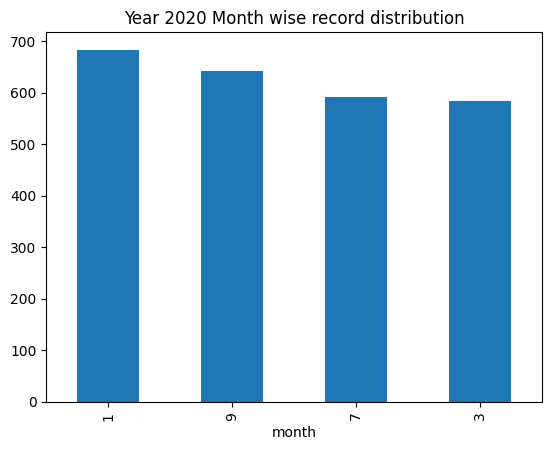

In [81]:
df_nosql["month"].value_counts().plot(kind="bar")
plt.title("Year 2020 Month wise record distribution")
plt.show()

Gracefully, this randomness brought data from every qauter recorded, maintaining proportion of original data. 
The reason behind is a simple mathematics of sampling. When something is picked completely with randomness, 
then the each such record have an equal probability of being picked. However, this can introduce a little skeweness.

In [82]:
# Drop the id column 
df_nosql.drop(["_id"], axis = 1, inplace = True)

In [83]:
df_nosql.head(3)

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,7,ARTISANS & VINES LLC,140031,FOUR SISTERS SHZ - 750ML,WINE,0.00,0.0,4.0
1,2020,7,E & J GALLO WINERY,80511,DAVINCI MONTALCINO BRUNELLO - 750ML,WINE,0.34,0.0,0.0
2,2020,1,E & J GALLO WINERY,313969,BAREFOOT CEL PINK MOSCATO - 1.5L,WINE,45.00,53.5,123.0


* MySQL data month comparison

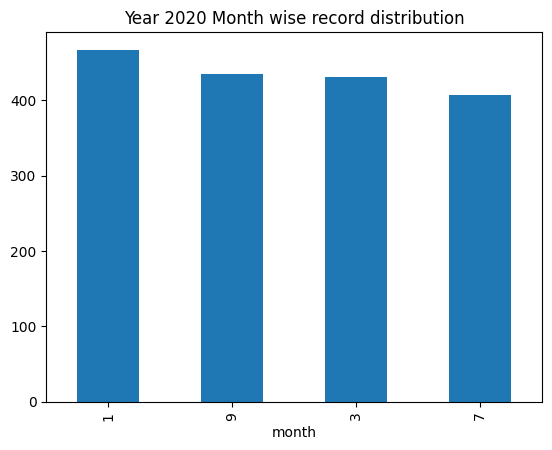

In [84]:
df_sql[df_sql["year"] == 2020]["month"].value_counts().plot(kind = "bar")
plt.title("Year 2020 Month wise record distribution")
plt.show()

* Extra records for year 2020 in NoSQL database fetched

In [85]:
print(f"Extra records in NoSQL: {len(df_nosql["month"]) - len(df_sql[df_sql["year"] == 2020]["month"])}")

Extra records in NoSQL: 760


* Merge both into tabular

In [86]:
f"Originally record in MySQL: {df_sql.shape[0]}"

'Originally record in MySQL: 10287'

In [87]:
f"Originally record in NoSQL: {df_nosql.shape[0]}"

'Originally record in NoSQL: 2500'

In [88]:
df_fetched_db = pd.concat([df_sql, df_nosql], ignore_index=True)

In [89]:
# Row, Column
df_fetched_db.shape

(12787, 9)

In [90]:
df_fetched_db

,year,month,supplier,item code,item description,item type,retail sales,retail transfers,warehouse sales
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00000
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00000
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00000
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00000
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00000
...,...,...,...,...,...,...,...,...,...
12782,2020,9,BARON FRANCOIS LTD,21180,SANCERRE WHITE SAUTEREAU - 750ML,WINE,15.55,16.0,4.00000
12783,2020,9,VIGNOBLES LVDH USA INC,400130,ESTACION CAB - 750ML,WINE,0.00,0.0,4.00000
12784,2020,7,RELIABLE CHURCHILL LLLP,13811,GRGICH HILLS CAB - 750ML,WINE,1.07,1.0,0.00000
12785,2020,7,PRESTIGE BEVERAGE GROUP OF MD LLC,333317,ANGELINI P/NOIR - 750ML,WINE,0.00,0.0,1.00000


# Analyse 

In [91]:
# Checking for duplicated from complimentary data 
df_fetched_db.duplicated().sum()

np.int64(92)

In [92]:
# Total null values - Not Expected
df_fetched_db.isna().sum().sum()

np.int64(0)

In [93]:
df_fetched_db.drop_duplicates(inplace=True)

In [94]:
f"Records: {df_fetched_db.shape[0]}"

'Records: 12695'

Initially, we had around 10k records, but withh complimentary data, we got around 2000+ unique records. 

In [95]:
df_fetched_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12695 entries, 0 to 12786
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              12695 non-null  int64  
 1   month             12695 non-null  int64  
 2   supplier          12695 non-null  object 
 3   item code         12695 non-null  object 
 4   item description  12695 non-null  object 
 5   item type         12695 non-null  object 
 6   retail sales      12695 non-null  float64
 7   retail transfers  12695 non-null  float64
 8   warehouse sales   12695 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 991.8+ KB


In [96]:
df_fetched_db.describe()

,year,month,retail sales,retail transfers,warehouse sales
count,12695.000000,12695.000000,12695.00000,12695.000000,12695.000000
mean,2018.558645,5.918393,6.36873,6.151654,10.125780
std,1.256528,3.674347,23.25499,22.963584,79.211566
min,2017.000000,1.000000,-0.83000,-7.000000,-99.000000
25%,2017.000000,2.000000,0.00000,0.000000,0.000000
50%,2019.000000,6.000000,0.33000,0.000000,1.000000
75%,2020.000000,9.000000,2.78000,2.000000,4.000000
max,2020.000000,12.000000,848.82000,929.170000,5387.000000


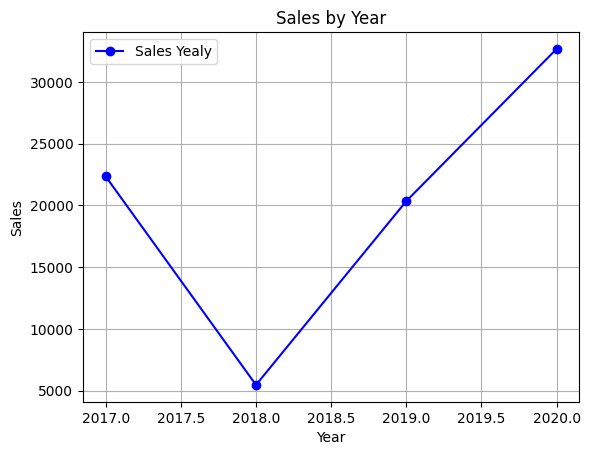

In [97]:
# Sales by year 
plt.plot(df_fetched_db.groupby(df_fetched_db.columns[0])["retail sales"].sum().index, \
         df_fetched_db.groupby(df_fetched_db.columns[0])["retail sales"].sum().values, \
         "ob-", label="Sales Yealy")
plt.title("Sales by Year")
plt.grid()
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()
plt.show()

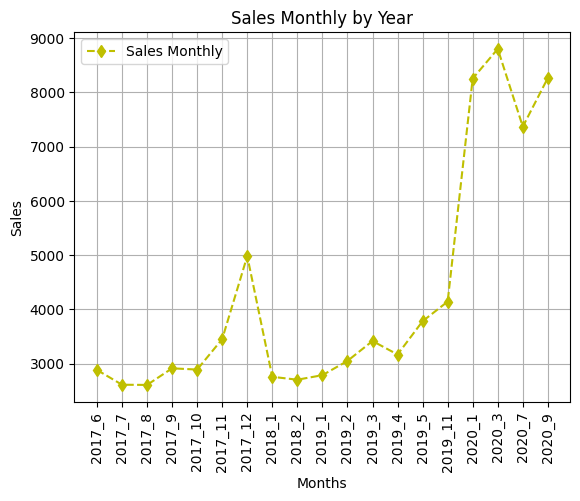

In [98]:
plt.plot([f"{i[0]}_{i[1]}" for i in df_fetched_db.groupby(["year", "month"])["retail sales"].sum().index], \
         df_fetched_db.groupby(["year", "month"])["retail sales"].sum().values,
         "dy--", label="Sales Monthly")
plt.title("Sales Monthly by Year")
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()
plt.show()

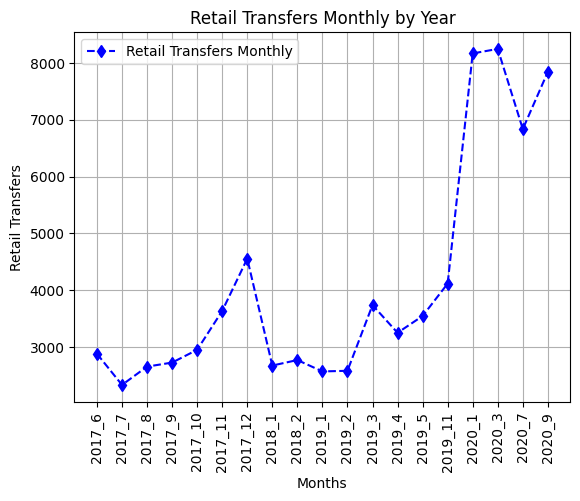

In [99]:
plt.plot([f"{i[0]}_{i[1]}" for i in df_fetched_db.groupby(["year", "month"])["retail transfers"].sum().index], \
         df_fetched_db.groupby(["year", "month"])["retail transfers"].sum().values,
         "db--", label="Retail Transfers Monthly")
plt.title("Retail Transfers Monthly by Year")
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Months")
plt.ylabel("Retail Transfers")
plt.legend()
plt.show()

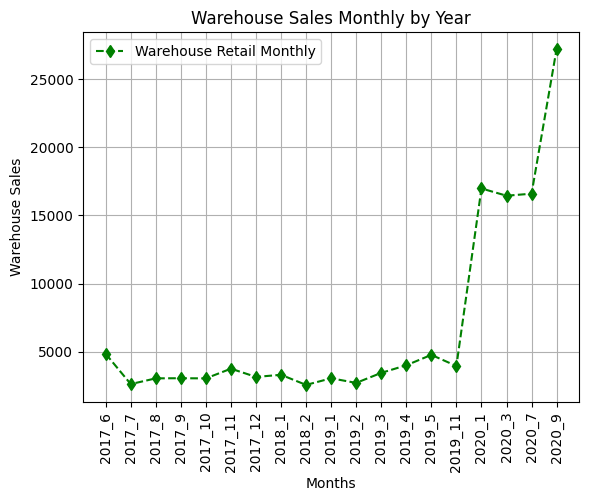

In [100]:
plt.plot([f"{i[0]}_{i[1]}" for i in df_fetched_db.groupby(["year", "month"])["warehouse sales"].sum().index], \
         df_fetched_db.groupby(["year", "month"])["warehouse sales"].sum().values,
         "dg--", label="Warehouse Retail Monthly")
plt.title("Warehouse Sales Monthly by Year")
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Months")
plt.ylabel("Warehouse Sales")
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20760\1222533607.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(month_labels, rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20760\1222533607.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(rt_labels, rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20760\1222533607.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(wh_labels, rotation=90)


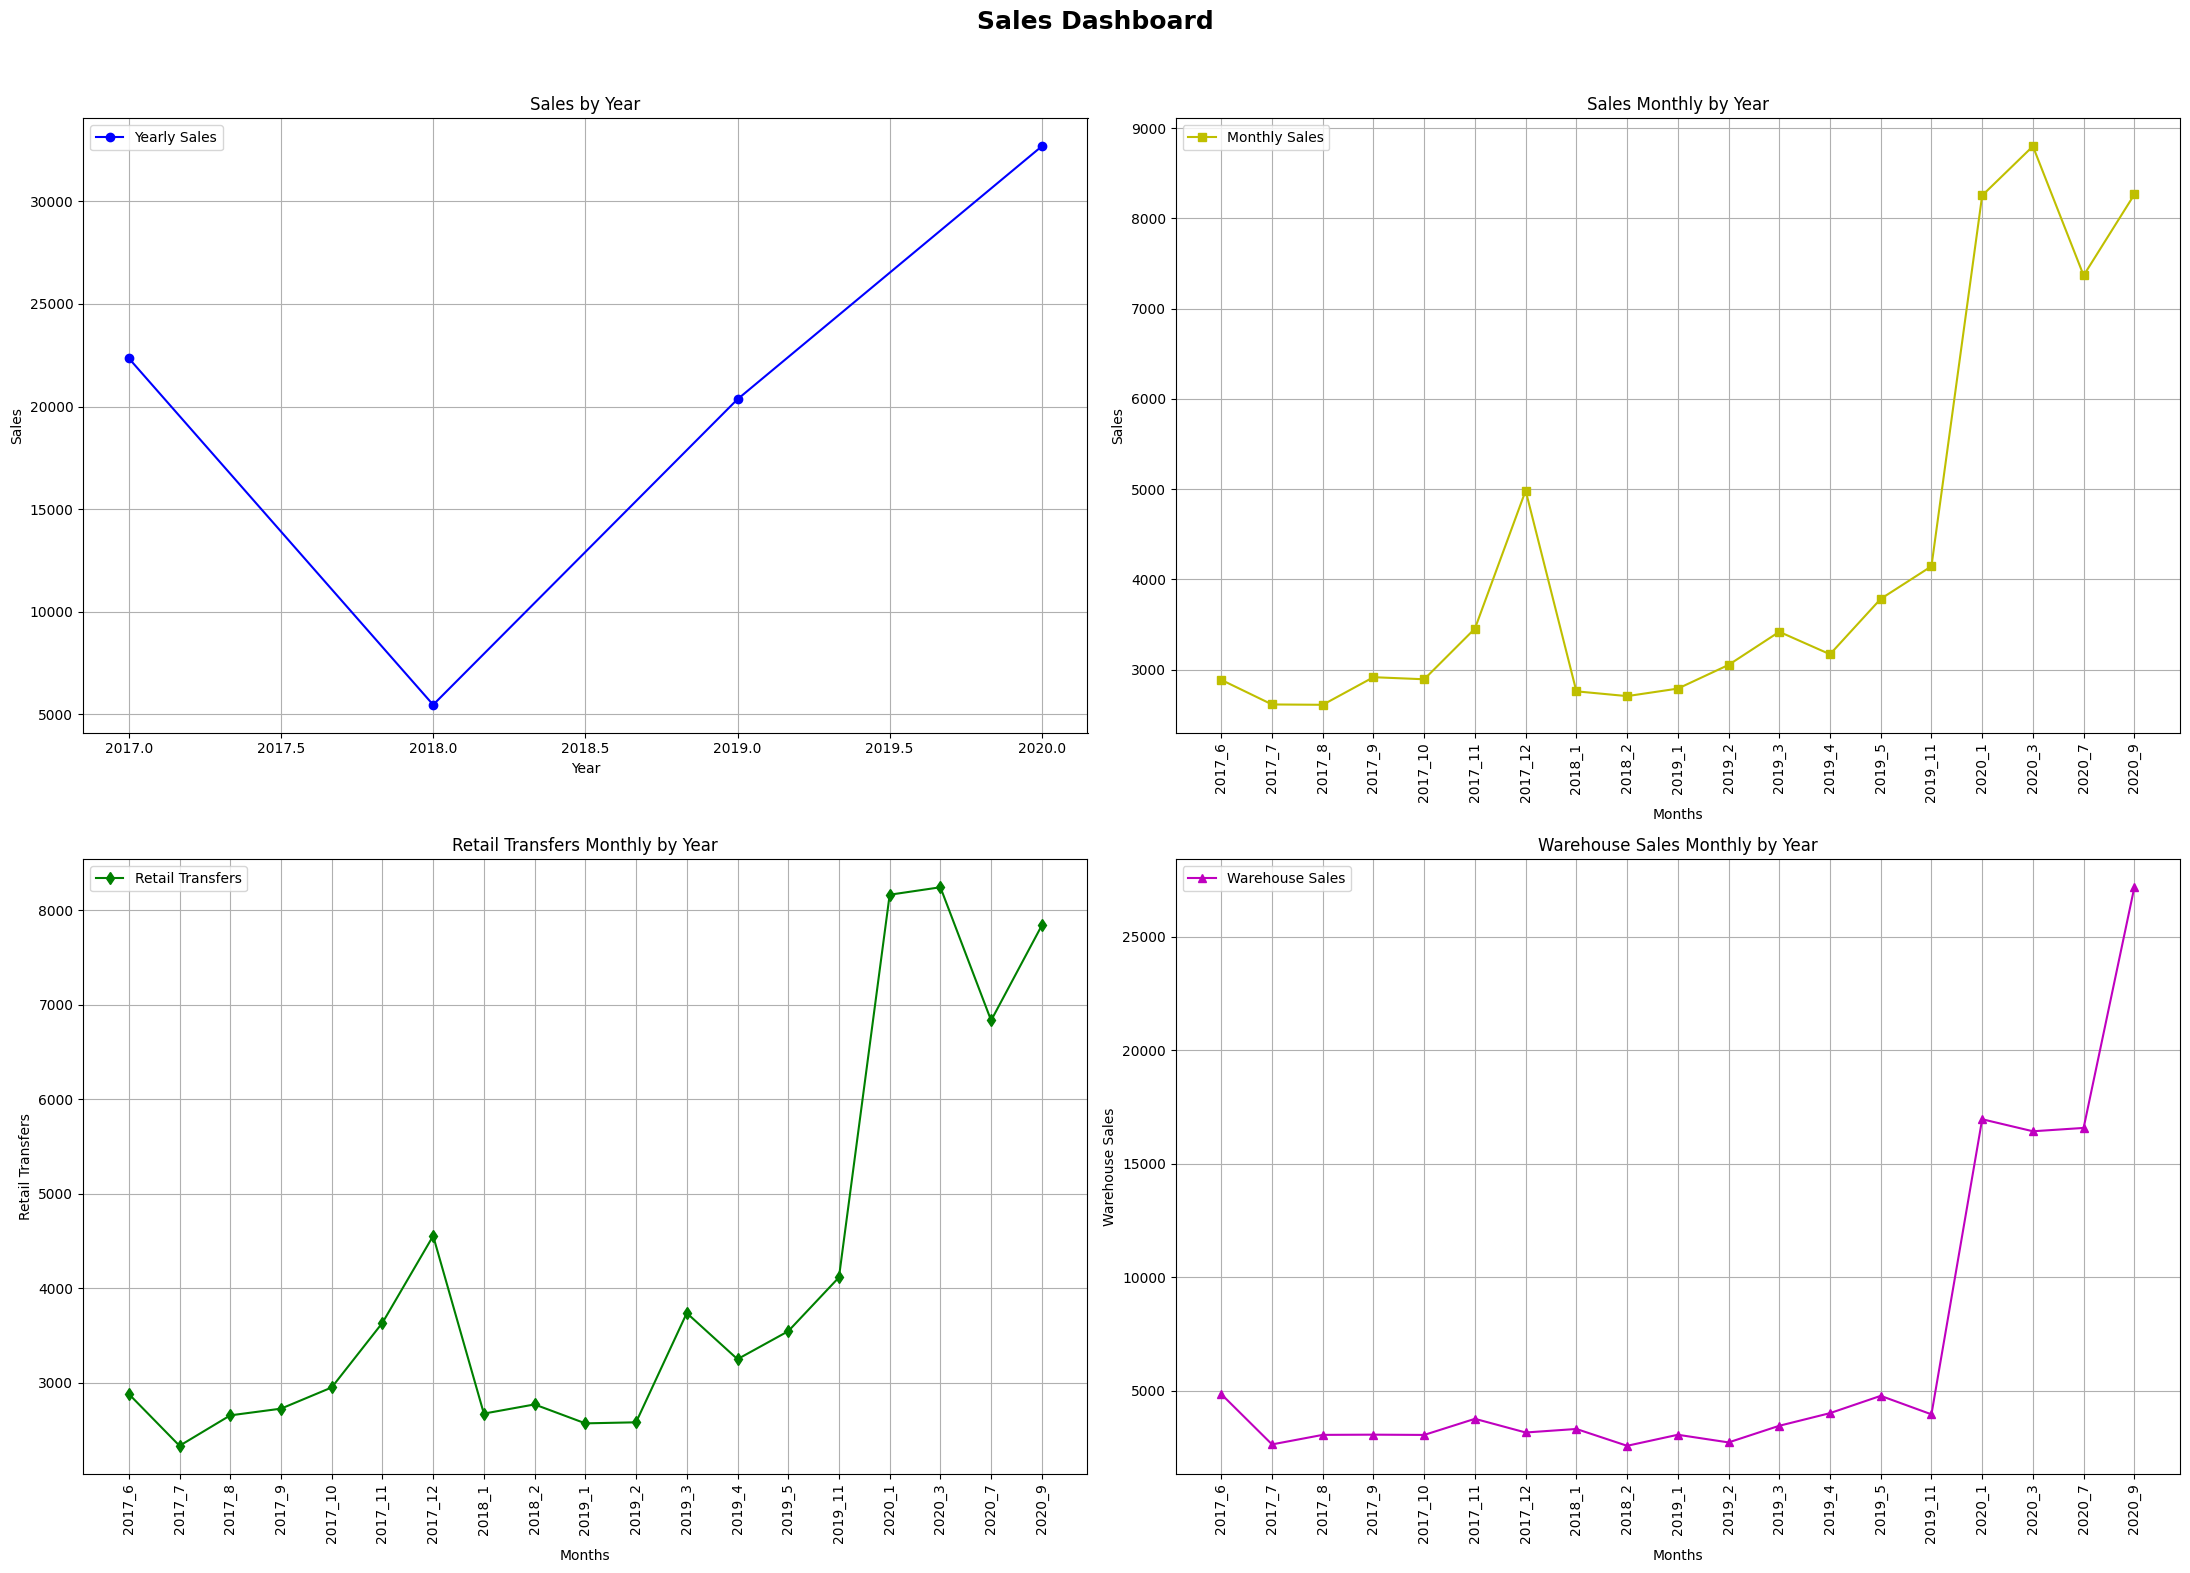

In [101]:
fig, axs = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle("Sales Dashboard", fontsize=18, fontweight='bold')

# Yearly Sales 
yearly_sales = df_fetched_db.groupby("year")["retail sales"].sum()
axs[0, 0].plot(yearly_sales.index, yearly_sales.values, "o-b", label="Yearly Sales")
axs[0, 0].set_title("Sales by Year")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Sales")
axs[0, 0].grid()
axs[0, 0].legend()

# Monthly Sales 
monthly_sales = df_fetched_db.groupby(["year", "month"])["retail sales"].sum()
month_labels = [f"{y}_{m}" for y, m in monthly_sales.index]
axs[0, 1].plot(month_labels, monthly_sales.values, "s-y", label="Monthly Sales")
axs[0, 1].set_title("Sales Monthly by Year")
axs[0, 1].set_xticklabels(month_labels, rotation=90)
axs[0, 1].set_xlabel("Months")
axs[0, 1].set_ylabel("Sales")
axs[0, 1].grid()
axs[0, 1].legend()

# Retail Transfers Monthly by Years 
retail_transfers = df_fetched_db.groupby(["year", "month"])["retail transfers"].sum()
rt_labels = [f"{y}_{m}" for y, m in retail_transfers.index]
axs[1, 0].plot(rt_labels, retail_transfers.values, "d-g", label="Retail Transfers")
axs[1, 0].set_title("Retail Transfers Monthly by Year")
axs[1, 0].set_xticklabels(rt_labels, rotation=90)
axs[1, 0].set_xlabel("Months")
axs[1, 0].set_ylabel("Retail Transfers")
axs[1, 0].grid()
axs[1, 0].legend()

# Warehouse Sales Monthly by Year
wh_sales = df_fetched_db.groupby(["year", "month"])["warehouse sales"].sum()
wh_labels = [f"{y}_{m}" for y, m in wh_sales.index]
axs[1, 1].plot(wh_labels, wh_sales.values, "^-m", label="Warehouse Sales")
axs[1, 1].set_title("Warehouse Sales Monthly by Year")
axs[1, 1].set_xticklabels(wh_labels, rotation=90)
axs[1, 1].set_xlabel("Months")
axs[1, 1].set_ylabel("Warehouse Sales")
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


There is some sought of yearly seasonality.

In [102]:
df_fetched_db.columns

Index(['year', 'month', 'supplier', 'item code', 'item description',
       'item type', 'retail sales', 'retail transfers', 'warehouse sales'],
      dtype='object')

In [103]:
# Most item recorded to be sold 
f"Item most sold: {df_fetched_db["item type"].value_counts().index[0]}, Count: {df_fetched_db["item type"].value_counts().values[0]}"

'Item most sold: WINE, Count: 5046'

In [104]:
f"Biggest Supplier: {df_fetched_db["supplier"].value_counts().index[0]}, Counts: {df_fetched_db["supplier"].value_counts().values[0]}"

'Biggest Supplier: LEGENDS LTD, Counts: 1952'

In [105]:
# Biggest Supplier most sold 
df_fetched_db[df_fetched_db["supplier"] == df_fetched_db["supplier"].value_counts().index[0]]["item type"].value_counts().index[0]

'BEER'

In [106]:
# Most Item sold biggest supplier 
df_fetched_db[df_fetched_db["item type"] == df_fetched_db["item type"].value_counts().index[0]]["supplier"].value_counts().index[0]

'REPUBLIC NATIONAL DISTRIBUTING CO'

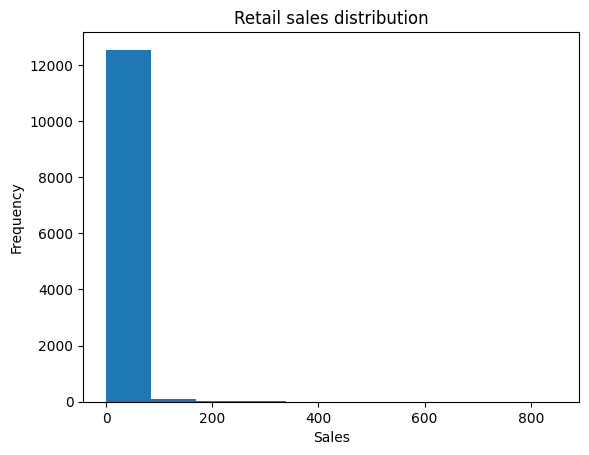

In [107]:
df_fetched_db["retail sales"].plot(kind="hist")
plt.title("Retail sales distribution")
plt.xlabel("Sales")
plt.show()

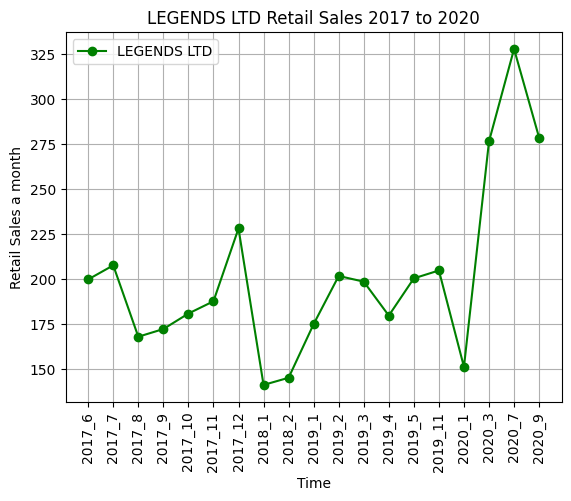

In [108]:
# Visualising sales for a supplier with most sale
x_axis = [f"{year}_{month}" for year, month in df_fetched_db[df_fetched_db["supplier"] == df_fetched_db["supplier"].mode()[0]].groupby(["year", "month"])["retail sales"].sum().index]
y_axis = df_fetched_db[df_fetched_db["supplier"] == df_fetched_db["supplier"].mode()[0]].groupby(["year", "month"])["retail sales"].sum().reset_index()["retail sales"]

plt.plot(x_axis, y_axis, "og-", label=f"{df_fetched_db["supplier"].mode()[0]}")
plt.title(f"{df_fetched_db["supplier"].mode()[0]} Retail Sales 2017 to 2020")
plt.xlabel("Time")
plt.ylabel("Retail Sales a month")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

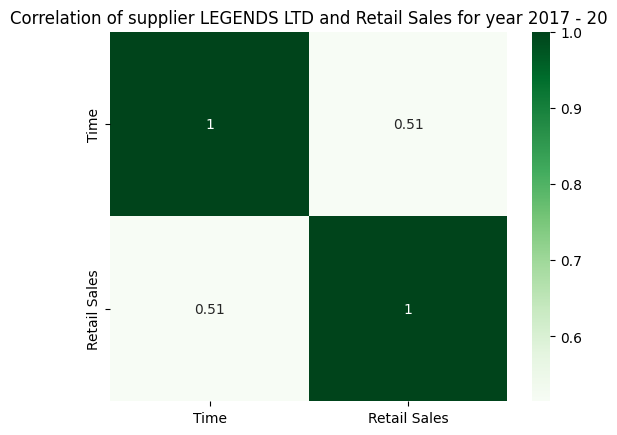

In [109]:
df_yearly_sales_legend_ltd = df_fetched_db[df_fetched_db["supplier"] == df_fetched_db["supplier"].mode()[0]].groupby(["year", "month"])["retail sales"].sum()

# Axis
x_axis = [i for i in range(1, len(df_yearly_sales_legend_ltd) + 1)]
y_axis = df_yearly_sales_legend_ltd.values

# Correlation of top supplier with retail sales 
sns.heatmap(pd.DataFrame({"Time": x_axis, "Retail Sales": y_axis}).corr(), annot=True, cmap="Greens")
plt.title(f"Correlation of supplier {df_fetched_db["supplier"].mode()[0]} and Retail Sales for year 2017 - 20")
plt.show()

The pearson correlation test illustrates the increase in sales positively with some relation in time and sales.  

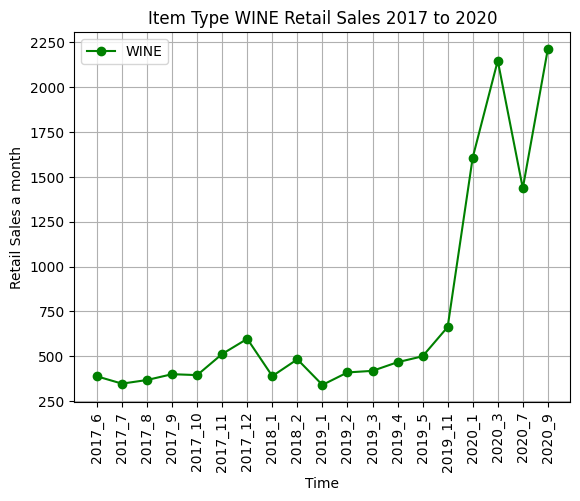

In [110]:
# Visualising sales for an Item Type with most sale
x_axis = [f"{year}_{month}" for year, month in df_fetched_db[df_fetched_db["item type"] == df_fetched_db["item type"].mode()[0]].groupby(["year", "month"])["retail sales"].sum().index]
y_axis = df_fetched_db[df_fetched_db["item type"] == df_fetched_db["item type"].mode()[0]].groupby(["year", "month"])["retail sales"].sum().reset_index()["retail sales"]

plt.plot(x_axis, y_axis, "og-", label=f"{df_fetched_db["item type"].mode()[0]}")
plt.title(f"Item Type {df_fetched_db["item type"].mode()[0]} Retail Sales 2017 to 2020")
plt.xlabel("Time")
plt.ylabel("Retail Sales a month")
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

Most of months, sales are arounf 50-100 

<b>Report</b>
1. We should meet all demands with biggest suppliers.
2. Should target small suppliers for more profit.
3. We should keep most sold item in stock.
4. We should sell in peak times such as last quarter.
5. We should focus month of march and find more detail of why so less sales.
6. It is noteworthy that the sales drop was significant after the mid of 2020, and that was the time when Covid - 19 hit around the globe. Montgomery went shutdown on March 16, 2020 and become stricter in the third quarter of the year 2020 as per the reports from https://en.wikipedia.org/wiki/Timeline_of_the_COVID-19_pandemic_in_Maryland#:~:text=NIH reports the first known, 16 at 12%3A01 am

# Analytics 

##### Ref:
1. https://facebook.github.io/prophet/docs/quick_start.html#python-api

#### Forecast Retail Sales in the upcoming time (Month or Year)

In [111]:
df_fetched_db.groupby(["year", "month"])["retail sales"].sum()

year  month
2017  6        2885.37
      7        2612.97
      8        2609.24
      9        2915.03
      10       2892.12
      11       3453.54
      12       4982.57
2018  1        2758.45
      2        2705.41
2019  1        2788.68
      2        3051.13
      3        3418.07
      4        3169.14
      5        3783.05
      11       4144.04
2020  1        8252.95
      3        8798.35
      7        7366.78
      9        8264.14
Name: retail sales, dtype: float64

With such it is hard to work with forecasting. However, we can still forecast using Prophet by Meta (formerly Facebook). We must ensure interpolation with some other values.

In [112]:
# Group by year–month
df = df_fetched_db.groupby(["year", "month"])["retail sales"].sum().reset_index()

In [113]:
# Building datetime column required by Prophet
df["ds"] = pd.to_datetime(
    df["year"].astype(str) + "-" + df["month"].astype(str) + "-01"
)

In [114]:
# Prophet expects columns: ds -> feature, y -> target
df = df.rename(columns={"retail sales": "y"})
df = df[["ds", "y"]]

print("Original (gapped) data:")
display(df.head())

Original (gapped) data:


,ds,y
0,2017-06-01,2885.37
1,2017-07-01,2612.97
2,2017-08-01,2609.24
3,2017-09-01,2915.03
4,2017-10-01,2892.12


In [115]:
# Rows, Cols
df.shape

(19, 2)

In [116]:
# Interpolating values for better forecasting
df = df.set_index("ds")

# Continuos monthly index
df = df.asfreq("MS")  # MS = Month Start

# Interpolate missing values
df["y"] = df["y"].interpolate(method="linear")

# Reset index back
df = df.reset_index()

print("\nAfter interpolation:")
display(df.head())


After interpolation:


,ds,y
0,2017-06-01,2885.37
1,2017-07-01,2612.97
2,2017-08-01,2609.24
3,2017-09-01,2915.03
4,2017-10-01,2892.12


In [117]:
# Updated - Rows, Cols
df.shape

(40, 2)

In [118]:
# Fitting Model 
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive'
)

model.fit(df)

21:15:04 - cmdstanpy - INFO - Chain [1] start processing
21:15:05 - cmdstanpy - INFO - Chain [1] done processing


In [119]:
# Forecasting
future = model.make_future_dataframe(periods=12, freq="MS") # Self define freq month start as each month start the retail sales is assumed
forecast = model.predict(future)

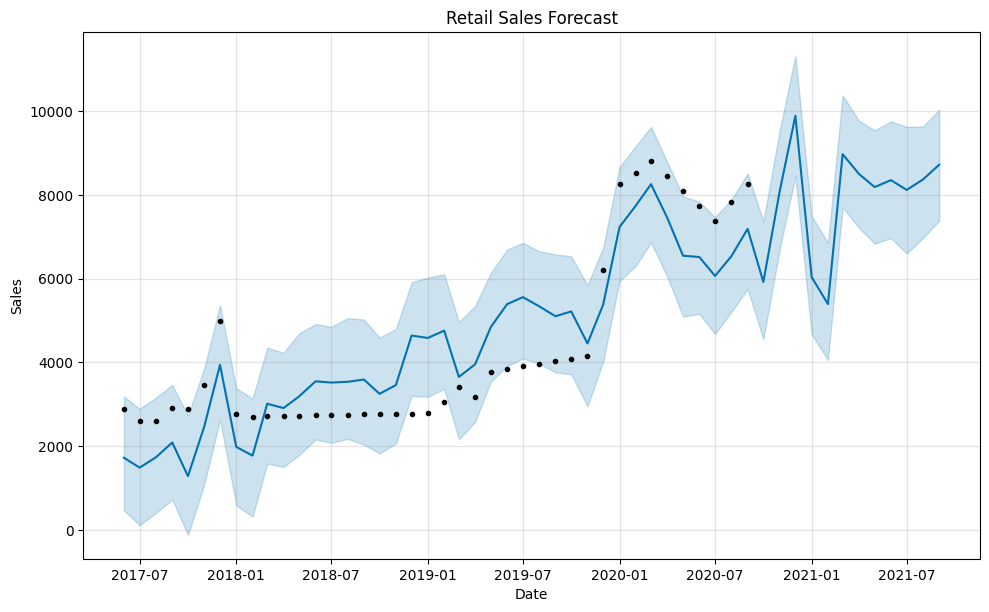

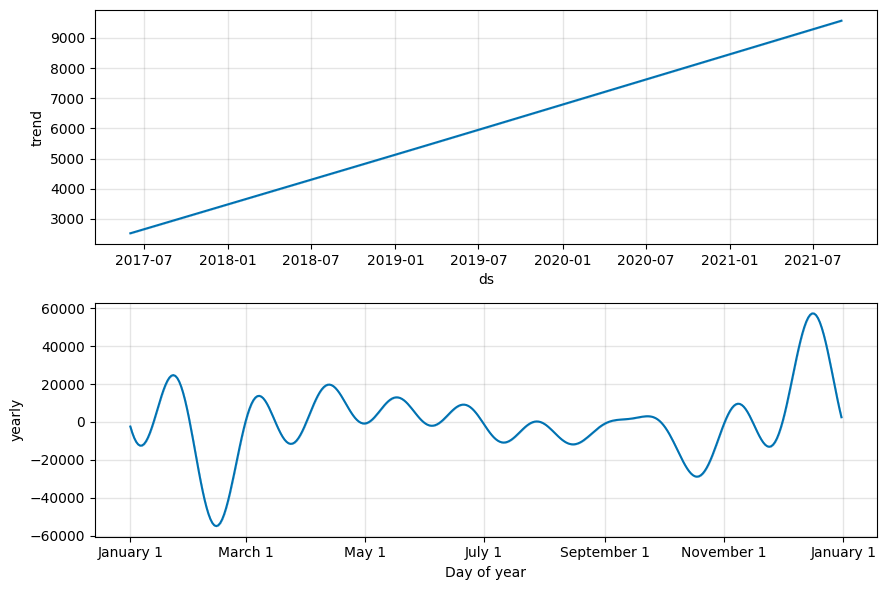


Forecast tail:
           ds         yhat   yhat_lower    yhat_upper
47 2021-05-01  8181.918319  6834.590925   9536.062117
48 2021-06-01  8347.833038  6963.317874   9748.011623
49 2021-07-01  8114.179329  6596.956779   9618.490631
50 2021-08-01  8362.683683  6965.771929   9627.531386
51 2021-09-01  8716.482290  7384.510591  10024.242113


In [120]:
# Forecast plot
fig1 = model.plot(forecast)
plt.title("Retail Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.savefig("resources/retail_sales_forecast.png", dpi=300, bbox_inches="tight")
plt.show()

# Forecast components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.savefig("resources/retail_sales_forecast_components.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nForecast tail:")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())


# Evaluate 

In [144]:
rmse = (sum((df["y"].values - forecast["yhat"][:len(df)].values) ** 2)/len(df)) ** (0.5)
print(f"RMSE = {rmse}")

RMSE = 1080.1736269001933


In [149]:
from sklearn.metrics import r2_score
r_sq = r2_score(df["y"].values, forecast["yhat"][:len(df)].values)
print(f"R Squared: {r_sq} \nVariance Explained: {(r_sq * 100):.2f}%")

R Squared: 0.7496031035746993 
Variance Explained: 74.96%


# Dump & Load

#### Prophet Model

* Dump

In [121]:
joblib.dump(model, "models/prophet_forecast_model_warehouse_liquor_sales.joblib")

['models/prophet_forecast_model_warehouse_liquor_sales.joblib']

* Load

In [122]:
joblib.load("models/prophet_forecast_model_warehouse_liquor_sales.joblib")

# Tabluae

1. Work in tableau
2. Refer Resources/tableau.gif

# Store df_fetched_db for streamlit

In [123]:
df_fetched_db.to_csv("D:/Datasets/Liquor_Sales_USA/df_sql_nosql_concat_db.csv")

# StreamLit

In [124]:
# !pip install streamlit

In [125]:
%%writefile app.py
# Importing libs 
import joblib 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import streamlit as st

# Page Config
st.set_page_config(
    page_title="Montgomery Warehouses Sales Analysis",
    page_icon="✒️",
    layout="wide"
)

# Intro 
st.title("Montgomery County Warehouses Sales Aanlysis")
with st.expander("Dataset Brief"):
    st.header("Dataset")
    st.write("""This analysis is performed for Warehouses in Montgomery County, USA about Sales. The data is provided by the Government. 
                        This dataset contains around half a million records for four years from 2017 to 2020 randomly. Not every month sales are mentioned.
                        However, the dataset is enough for performing analysis and analytics efficiently.""")

# Load data 
df_fetched_db = pd.read_csv("D:/Datasets/Liquor_Sales_USA/df_sql_nosql_concat_db.csv")

# Dashboard
# year filter
available_years = sorted(df_fetched_db["year"].unique())
selected_years = st.multiselect(
    "Select Year(s)",
    options=available_years,
    default=available_years
)

df_filtered = df_fetched_db[df_fetched_db["year"].isin(selected_years)]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Sales Dashboard", fontsize=18, fontweight="bold")

# Yearly Sales
yearly_sales = df_filtered.groupby("year")["retail sales"].sum()
axs[0, 0].plot(yearly_sales.index, yearly_sales.values, "o-b", label="Yearly Sales")
axs[0, 0].set_title("Sales by Year")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Sales")
axs[0, 0].grid()
axs[0, 0].legend()

# Monthly Sales
monthly_sales = df_filtered.groupby(["year", "month"])["retail sales"].sum()
month_labels = [f"{y}_{m}" for y, m in monthly_sales.index]
axs[0, 1].plot(month_labels, monthly_sales.values, "s-y", label="Monthly Sales")
axs[0, 1].set_title("Sales Monthly by Year")
axs[0, 1].set_xlabel("Months")
axs[0, 1].set_ylabel("Sales")
axs[0, 1].tick_params(axis="x", rotation=90)
axs[0, 1].grid()
axs[0, 1].legend()

# Retail Transfers
retail_transfers = df_filtered.groupby(["year", "month"])["retail transfers"].sum()
rt_labels = [f"{y}_{m}" for y, m in retail_transfers.index]
axs[1, 0].plot(rt_labels, retail_transfers.values, "d-g", label="Retail Transfers")
axs[1, 0].set_title("Retail Transfers Monthly by Year")
axs[1, 0].set_xlabel("Months")
axs[1, 0].set_ylabel("Retail Transfers")
axs[1, 0].tick_params(axis="x", rotation=90)
axs[1, 0].grid()
axs[1, 0].legend()

# Warehouse Sales
warehouse_sales = df_filtered.groupby(["year", "month"])["warehouse sales"].sum()
wh_labels = [f"{y}_{m}" for y, m in warehouse_sales.index]
axs[1, 1].plot(wh_labels, warehouse_sales.values, "^-m", label="Warehouse Sales")
axs[1, 1].set_title("Warehouse Sales Monthly by Year")
axs[1, 1].set_xlabel("Months")
axs[1, 1].set_ylabel("Warehouse Sales")
axs[1, 1].tick_params(axis="x", rotation=90)
axs[1, 1].grid()
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Don't overlap (left, bottom, right, top)
st.pyplot(fig) # Put figure canvas to streamlit 

# Analytics 
st.image("resources/retail_sales_forecast.png", caption="Retail Sales Forecast", use_container_width=True)
st.image(
    "resources/retail_sales_forecast_components.png",
    caption="Forecast Components (Trend & Seasonality)",
    use_container_width=True
)

# REF:
# 1. https://docs.streamlit.io/
# 2. https://medium.com/@verinamk/streamlit-for-beginners-build-your-first-dashboard-58b764a62a2d

Overwriting app.py


In [126]:
!streamlit run app.py

^C


# Git 

Achive using command prompt 